## Predict Profit with ML and ANN Regression Model
by Polakorn Anantapakorn (Ming)
### The Data
sample -SuperstoreClean.csv

### feature column
Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID 
Customer Name 
Segment         
Country/Region  
City           
State/Province  
Postal Code     
Region          
Product ID      
Category       
Sub-Category    
Product Name    
Sales           
Quantity        
Discount        
Profit          

### Objective


In [758]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import set_option
import random as rnd
import seaborn as sns

In [759]:
df = pd.read_csv('Sample - SuperstoreClean.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2020-103800,3/1/2020,7/1/2020,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.45,2,0.2,5.55
1,2,US-2020-112326,4/1/2020,8/1/2020,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.54,2,0.8,-5.49
2,3,US-2020-112326,4/1/2020,8/1/2020,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.78,3,0.2,4.27
3,4,US-2020-112326,4/1/2020,8/1/2020,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.74,3,0.2,-64.77
4,5,US-2020-141817,5/1/2020,12/1/2020,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.54,3,0.2,4.88


In [760]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          10194 non-null  int64  
 1   Order ID        10194 non-null  object 
 2   Order Date      10194 non-null  object 
 3   Ship Date       10194 non-null  object 
 4   Ship Mode       10194 non-null  object 
 5   Customer ID     10194 non-null  object 
 6   Customer Name   10194 non-null  object 
 7   Segment         10194 non-null  object 
 8   Country/Region  10194 non-null  object 
 9   City            10194 non-null  object 
 10  State/Province  10194 non-null  object 
 11  Postal Code     10194 non-null  object 
 12  Region          10194 non-null  object 
 13  Product ID      10194 non-null  object 
 14  Category        10194 non-null  object 
 15  Sub-Category    10194 non-null  object 
 16  Product Name    10194 non-null  object 
 17  Sales           10194 non-null 

In [761]:
df.describe()

,Row ID,Sales,Quantity,Discount,Profit
count,10194.000000,10194.00000,10194.000000,10194.000000,10194.000000
mean,5097.500000,228.22587,3.791838,0.155385,28.673475
std,2942.898656,619.90687,2.228317,0.206249,232.465210
min,1.000000,0.44000,1.000000,0.000000,-6599.980000
25%,2549.250000,17.22000,2.000000,0.000000,1.760000
50%,5097.500000,53.91000,3.000000,0.200000,8.690000
75%,7645.750000,209.50000,5.000000,0.200000,29.297500
max,10194.000000,22638.48000,14.000000,0.800000,8399.980000


In [762]:
df.shape

(10194, 21)

In [763]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Country/Region     object
City               object
State/Province     object
Postal Code        object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
dtype: object

# Feature Engineering

เป็นกระบวนการหรือขั้นตอนในการเปลี่ยนข้อมูลให้อยู่ในรูปของ vector หรือ matrix หรือ ตัวเลขใดๆ ที่ทำให้ คอมพิวเตอร์สามารถอ่านได้ และ ใช้วิธีแปลงข้อมูลเป็นรูปแบบที่สามารถใช้สำหรับการเรียนรู้ของเครื่องได้อย่างมีประสิทธิภาพ

In [764]:
# Remove Unique ID
df = df.drop(['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Postal Code', 'Product ID'], axis=1)
df.shape
print(df.columns)
print(len(df.columns))

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'Country/Region',
       'City', 'State/Province', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
15


In [765]:
print(df['Product Name'].value_counts())
print(df['Product Name'].unique())

['Message Book, Wirebound, Four 5 1/2" X 4" Forms/Pg., 200 Dupl. Sets/Book'
 'GBC Standard Plastic Binding Systems Combs' 'Avery 508' ... 'Xerox 1901'
 'Panasonic Business\xa0Telephones\xa0KX-T7736'
 'Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order']


ordinal encoding date

In [766]:
import datetime as dt
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Order Date'] = df['Order Date'].map(dt.datetime.toordinal)
print(df['Order Date'].head())
print(df['Order Date'].dtype)

0    737427
1    737428
2    737428
3    737428
4    737429
Name: Order Date, dtype: int64
int64


In [767]:
import datetime as dt
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)
df['Ship Date'] = df['Ship Date'].map(dt.datetime.toordinal)
print(df['Ship Date'].head())
print(df['Ship Date'].dtype)

0    737431
1    737432
2    737432
3    737432
4    737436
Name: Ship Date, dtype: int64
int64


In [768]:
print(df.columns)
print(df.info())

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'Country/Region',
       'City', 'State/Province', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Date      10194 non-null  int64  
 1   Ship Date       10194 non-null  int64  
 2   Ship Mode       10194 non-null  object 
 3   Segment         10194 non-null  object 
 4   Country/Region  10194 non-null  object 
 5   City            10194 non-null  object 
 6   State/Province  10194 non-null  object 
 7   Region          10194 non-null  object 
 8   Category        10194 non-null  object 
 9   Sub-Category    10194 non-null  object 
 10  Product Name    10194 non-null  object 
 11  Sales           10194 non-null  float64
 12  Quantity        1019

Ordinal encoding from String to integer

In [769]:
# ordinal encoding
columns = [ele for ele in (df.columns)]
columns.remove('Ship Date')
columns.remove('Order Date')
columns.remove('Sales')
columns.remove('Quantity')
columns.remove('Discount')
columns.remove('Profit')
print(columns)
print(len(columns))


['Ship Mode', 'Segment', 'Country/Region', 'City', 'State/Province', 'Region', 'Category', 'Sub-Category', 'Product Name']
9


In [770]:

for col in columns:
    dictionary = {}
    # print(col)
    # make dict to mapping value
    for index, item in enumerate((df[col].unique())):
        dictionary[item] = index
    df[col] = df[col].map(dictionary).astype(int)
print(df)

       Order Date  Ship Date  Ship Mode  Segment  Country/Region  City  \
0          737427     737431          0        0               0     0   
1          737428     737432          0        1               0     1   
2          737428     737432          0        1               0     1   
3          737428     737432          0        1               0     1   
4          737429     737436          0        0               0     2   
...           ...        ...        ...      ...             ...   ...   
10189      738884     738888          0        0               0    26   
10190      738884     738888          0        2               0   172   
10191      738884     738888          0        0               0   509   
10192      738884     738888          0        0               0    26   
10193      738884     738888          0        0               1   276   

       State/Province  Region  Category  Sub-Category  Product Name   Sales  \
0                   0       0   

In [771]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Date      10194 non-null  int64  
 1   Ship Date       10194 non-null  int64  
 2   Ship Mode       10194 non-null  int32  
 3   Segment         10194 non-null  int32  
 4   Country/Region  10194 non-null  int32  
 5   City            10194 non-null  int32  
 6   State/Province  10194 non-null  int32  
 7   Region          10194 non-null  int32  
 8   Category        10194 non-null  int32  
 9   Sub-Category    10194 non-null  int32  
 10  Product Name    10194 non-null  int32  
 11  Sales           10194 non-null  float64
 12  Quantity        10194 non-null  int64  
 13  Discount        10194 non-null  float64
 14  Profit          10194 non-null  float64
dtypes: float64(3), int32(9), int64(3)
memory usage: 836.4 KB


array([[<Axes: title={'center': 'Order Date'}>,
        <Axes: title={'center': 'Ship Date'}>,
        <Axes: title={'center': 'Ship Mode'}>,
        <Axes: title={'center': 'Segment'}>],
       [<Axes: title={'center': 'Country/Region'}>,
        <Axes: title={'center': 'City'}>,
        <Axes: title={'center': 'State/Province'}>,
        <Axes: title={'center': 'Region'}>],
       [<Axes: title={'center': 'Category'}>,
        <Axes: title={'center': 'Sub-Category'}>,
        <Axes: title={'center': 'Product Name'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Discount'}>,
        <Axes: title={'center': 'Profit'}>, <Axes: >]], dtype=object)

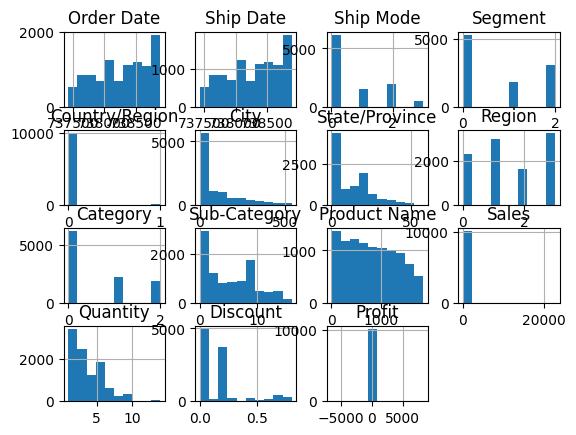

In [772]:
df.hist()

In [773]:
df.corr()

,Order Date,Ship Date,Ship Mode,Segment,Country/Region,City,State/Province,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,1.000000,0.999991,0.031424,0.009323,-0.012202,0.145299,0.040679,0.003600,0.001997,-0.004043,0.245129,-0.009125,-0.000174,-0.000356,0.004293
Ship Date,0.999991,1.000000,0.028499,0.009389,-0.012154,0.145254,0.040818,0.003529,0.001930,-0.004079,0.245087,-0.009155,-0.000088,-0.000363,0.004276
Ship Mode,0.031424,0.028499,1.000000,-0.024736,-0.037038,0.013926,-0.013407,0.015536,0.010980,0.002416,0.018111,0.006894,-0.016492,-0.029566,0.004616
Segment,0.009323,0.009389,-0.024736,1.000000,0.018469,0.009395,0.017722,0.003431,0.005104,0.006106,0.002747,0.008123,0.018099,-0.004491,0.009924
Country/Region,-0.012202,-0.012154,-0.037038,0.018469,1.000000,0.041476,0.251961,-0.015642,-0.000329,0.016629,-0.044634,-0.018613,0.007184,-0.028044,0.000502
City,0.145299,0.145254,0.013926,0.009395,0.041476,1.000000,0.299379,-0.033771,-0.006337,0.002166,0.038970,-0.023470,0.000253,-0.011414,-0.012367
State/Province,0.040679,0.040818,-0.013407,0.017722,0.251961,0.299379,1.000000,-0.010190,-0.009516,-0.010746,0.000745,0.029958,0.002025,-0.307531,0.084647
Region,0.003600,0.003529,0.015536,0.003431,-0.015642,-0.033771,-0.010190,1.000000,0.013207,0.012567,-0.000539,0.006356,0.013776,-0.211569,0.022747
Category,0.001997,0.001930,0.010980,0.005104,-0.000329,-0.006337,-0.009516,0.013207,1.000000,0.539792,0.090842,0.219161,-0.004873,-0.030772,0.077184
Sub-Category,-0.004043,-0.004079,0.002416,0.006106,0.016629,0.002166,-0.010746,0.012567,0.539792,1.000000,0.071833,0.226783,-0.019578,-0.055014,0.047726


In [774]:
# feature select
df = df.drop(['Order Date', 'Ship Date', 'Ship Mode', 'Country/Region', 'Segment'], axis=1)

In [775]:
df.describe()

,City,State/Province,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.00000,10194.000000,10194.000000,10194.000000
mean,104.956543,13.391995,1.568079,0.581813,5.363253,807.583088,228.22587,3.791838,0.155385,28.673475
std,126.659403,11.952741,1.158373,0.780556,4.268643,507.842718,619.90687,2.228317,0.206249,232.465210
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.44000,1.000000,0.000000,-6599.980000
25%,12.000000,5.000000,1.000000,0.000000,1.000000,370.000000,17.22000,2.000000,0.000000,1.760000
50%,40.000000,9.000000,1.000000,0.000000,5.000000,778.000000,53.91000,3.000000,0.200000,8.690000
75%,151.000000,21.000000,3.000000,1.000000,8.000000,1221.000000,209.50000,5.000000,0.200000,29.297500
max,541.000000,58.000000,3.000000,2.000000,16.000000,1848.000000,22638.48000,14.000000,0.800000,8399.980000


Show some interesting features

In [776]:
df_show = df[['State/Province', 'Sales', 'Quantity', 'Discount', 'Profit']] 
df_show

,State/Province,Sales,Quantity,Discount,Profit
0,0,16.45,2,0.2,5.55
1,1,3.54,2,0.8,-5.49
2,1,11.78,3,0.2,4.27
3,1,272.74,3,0.2,-64.77
4,2,19.54,3,0.2,4.88
...,...,...,...,...,...
10189,21,52.78,3,0.2,19.79
10190,5,20.72,2,0.2,6.48
10191,27,3.02,3,0.2,-0.60
10192,21,90.93,7,0.0,2.73


In [777]:
df_show.corr()

,State/Province,Sales,Quantity,Discount,Profit
State/Province,1.000000,0.029958,0.002025,-0.307531,0.084647
Sales,0.029958,1.000000,0.198457,-0.027756,0.481460
Quantity,0.002025,0.198457,1.000000,0.007475,0.066145
Discount,-0.307531,-0.027756,0.007475,1.000000,-0.218882
Profit,0.084647,0.481460,0.066145,-0.218882,1.000000


array([[<Axes: title={'center': 'State/Province'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Discount'}>],
       [<Axes: title={'center': 'Profit'}>, <Axes: >]], dtype=object)

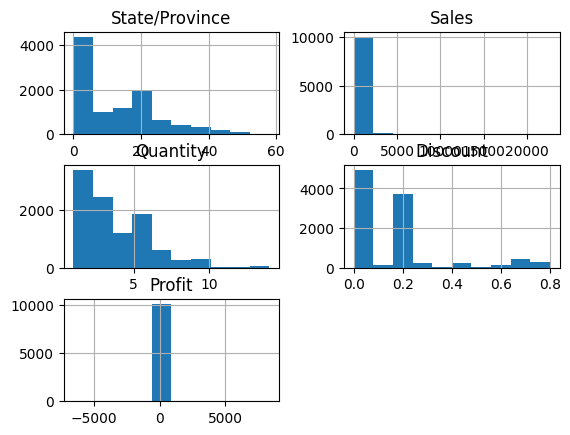

In [778]:
df_show.hist()

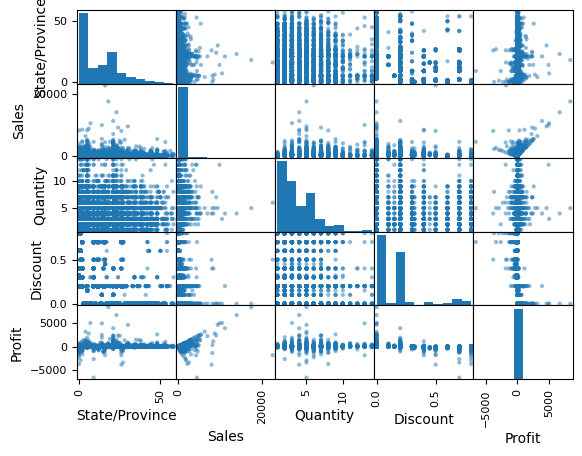

       City  State/Province  Region  Category  Sub-Category  Product Name  \
0         0               0       0         0             0             0   
1         1               1       0         0             1             1   
2         1               1       0         0             2             2   
3         1               1       0         0             3             3   
4         2               2       1         0             4             4   
...     ...             ...     ...       ...           ...           ...   
10189    26              21       1         0             1           379   
10190   172               5       3         0             1          1441   
10191   509              27       3         0             6          1375   
10192    26              21       1         2             7          1561   
10193   276              51       1         0             1           820   

        Sales  Quantity  Discount  Profit  
0       16.45         2       0

In [779]:
pd.plotting.scatter_matrix(df_show)
plt.show()
print(df)
print(df.columns)

In [780]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

### Linear Regression Model

Note: Normalization  วิธีการปรับช่วงขอบเขตของข้อมูลชนิดตัวเลข Cardinal แต่ละ Feature (Field) ให้อยู่ในช่วงเดียวกัน ที่เหมาะกับการนำไปประมวลผลต่อ เหมาะสำหรับนำข้อมูลไปประมวลผลกับ Deep learning

In [781]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import numpy as np
# CODE HERE
X = df.drop(['Profit'], axis=1)
Y = df['Profit']

# Splitting the data into training and validation sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# define min max scaler or Feature Scaling
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

# Creating and fitting the Linear Regression model
# linear_reg_model = LinearRegression()
# linear_reg_model = Ridge()
# linear_reg_model = Lasso()
# linear_reg_model = ElasticNet()
linear_reg_model = DecisionTreeRegressor()
# linear_reg_model = SVR()

linear_reg_model.fit(x_train, y_train)

# Predicting values for the validation set
y_test_predict = linear_reg_model.predict(scaler.transform(x_test))
# y_test_predict = linear_reg_model.predict(x_test)


# Displaying the parameters of the linear model
# coefficients = linear_reg_model.coef_
# intercept = linear_reg_model.intercept_

# Comparing predicted values with actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predict})

# Evaluating the model
mae_test = mean_absolute_error(y_test, y_test_predict)
mse_test = mean_squared_error(y_test,y_test_predict)
rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

# print("coefficients",coefficients)
# print("intercept", intercept)
print("comparison",comparison)
print("mae_test", mae_test)
print("mse_test", mse_test)
print("rmse_test", rmse_test)
print("r2", r2)

comparison        Actual  Predicted
6636   -14.33     -13.84
3742     4.77       0.00
5114    -7.71    -143.43
6505   108.18     108.18
10072  218.25     322.18
...       ...        ...
3898     8.28       8.28
5766     7.67       7.67
8652   256.78     375.74
5563   -90.25     -48.70
2820   -73.18     -11.34

[2039 rows x 2 columns]
mae_test 22.99196665031878
mse_test 16193.467157332023
rmse_test 127.25355459605842
r2 0.8195230500996425


# R Sqaured Value (R2)
เราวิเคราะห์ด้วย Linear regression model จึงมีความจำเป็นที่ต้องอ่านค่า R-squared และแปลความหมาย ค่า R-squared จะมีค่าอยู่ในช่วง 0 ถึง 100% โดยที่ 0% หมายถึงโมเดลที่ไม่สามารถอธิบายความแปรปรวนของโมเดลที่ตัวแปรส่งผลต่อกันได้ และ 100% หมายถึง โมเดลที่สามารถอธิบายความแปรปรวนของตัวแปรที่ส่งผลต่อกันได้ดี 

โดยปกติก็จะกล่าวว่าค่า R-squared ยิ่งมาก ก็แสดงว่า Linear regression model ก็จะสอดคล้องกับข้อมูลที่เรามีมาก

The model performance for testing set
--------------------------------------
MAE is 22.99196665031878
RMSE is 127.25355459605842
2039
2039


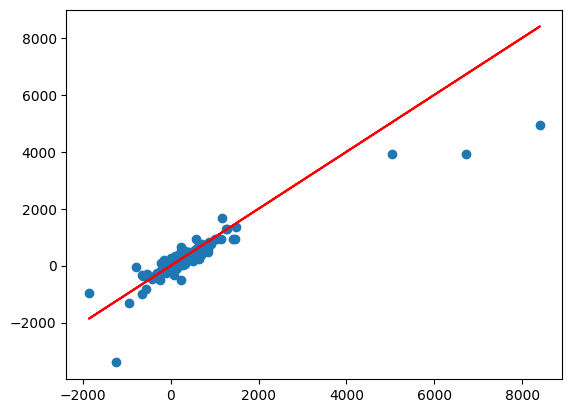

In [ ]:
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae_test))
print('RMSE is {}'.format(rmse_test))
# Our predictions
plt.scatter(y_test,y_test_predict)

# Perfect predictions
plt.plot(y_test,y_test,'r')
print(len(y_test))
print(len(y_test_predict))

### ANN REGRESSION DEEP-WIDTH LAYER

In [847]:
X = df.drop(['Profit'], axis=1)
Y = df['Profit']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# define min max scaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

In [848]:
#CODE HERE
from keras.models import Sequential
from keras.layers import Dense

#define the keras model
model = Sequential()
#model 1
model.add(Dense(160, input_dim=9, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))
# best result r2 96
model.compile(loss='mse')


history = model.fit(x_train, y_train, epochs=100, batch_size=8, validation_split=0.33, verbose=1)

Epoch 1/100
683/683 [==============================] - 2s 2ms/step - loss: 36691.9141 - val_loss: 50737.8555
Epoch 2/100
683/683 [==============================] - 1s 2ms/step - loss: 33477.6172 - val_loss: 45291.3789
Epoch 3/100
683/683 [==============================] - 1s 2ms/step - loss: 29558.9590 - val_loss: 41539.7305
Epoch 4/100
683/683 [==============================] - 1s 2ms/step - loss: 26993.3125 - val_loss: 39953.4922
Epoch 5/100
683/683 [==============================] - 1s 2ms/step - loss: 25129.3848 - val_loss: 40909.1484
Epoch 6/100
683/683 [==============================] - 1s 2ms/step - loss: 23796.0312 - val_loss: 39405.6680
Epoch 7/100
683/683 [==============================] - 1s 2ms/step - loss: 23686.8691 - val_loss: 39726.4648
Epoch 8/100
683/683 [==============================] - 1s 2ms/step - loss: 22929.5605 - val_loss: 40710.6055
Epoch 9/100
683/683 [==============================] - 1s 2ms/step - loss: 22460.5957 - val_loss: 41047.1133
Epoch 10/100
683/68

dict_keys(['loss', 'val_loss'])


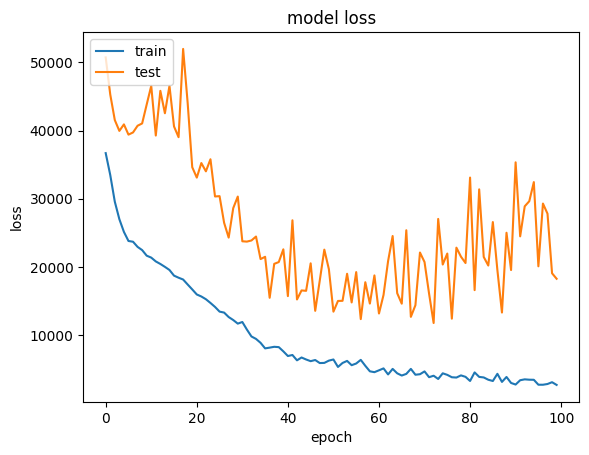

64/64 [==============================] - 0s 990us/step
The model performance for testing set
--------------------------------------------------
MAE is 26.268598985326765
MSE is 3589.6788459446884
RMSE is 59.91392864722433


In [849]:

#list all data in history
print(history.history.keys())
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#model Evaluation for testing set
y_pred = model.predict(scaler.transform(x_test))
# y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

print("The model performance for testing set")
print("-"*50)
print(f'MAE is {mae}')
print(f'MSE is {mse}')
print(f'RMSE is {rmse}')

Sample:  2039
Sample:  2039
0.9599928611369308


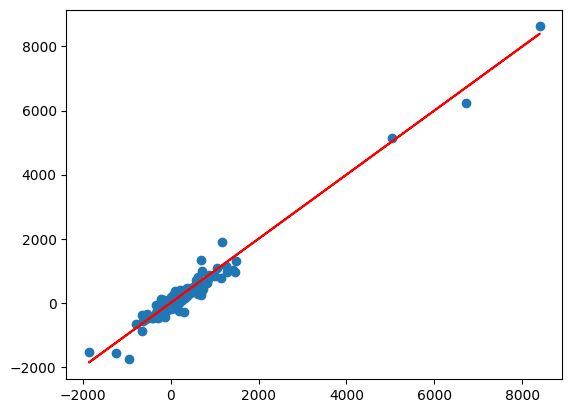

In [850]:
#Our predictions
plt.scatter(y_test, y_pred)

#Perfect prediction
plt.plot(y_test, y_test, 'r')
print("Sample: ",len(y_test))
print("Sample: ",len(y_pred))

r2 = r2_score(y_test, y_pred)
print(r2)

In [ ]:
model.save("my_model.keras")

### Conclusion
จากข้อมูลชุด Order เราสามารถคาดการค่า Profits ได้จากการทำนายรูปแบบ Linear Regression ได้จาก Machine Learning (Linear Regrssion Model และ ) และ Deep learning (ANN Regrssion model by Keras) ด้วยประมวลจากข้อมูล Feature ดังนี้ 'City', 'State/Province', 'Region', 'Category', 'Sub-Category','Product Name', 'Sales', 'Quantity', 'Discount' (9 features) เพราะค่า Correlation ของ Feature ที่กล่าวมา มีค่าไม่ได้อยู่ในช่วง (-0.01, 0.01) แสดงถึงค่าข้อมูลมีความสัมพันธ์กับข้อมูล Profits

จากการ Training Model สองรูปแบบได้แก่ Machine Learning DecisionTreeRegressor และ kearas ANN Regrssion ได้ผลดังนี้

Mahine Learning DecisionTreeRegressor
MAE     22.99
MSE     16193.47
RSME    127.25
R2      81.95%

kearas ANN Regrssion 
MAE     26.27
MSE     3589.68
RMSE    59.91
R2      95.99%

ค่า R2 แสดงให้เห็นความสัมพันธ์จากการที่ Model ทำนายค่า Profit มีความสอดคล้องข้อมูลที่มีมากน้อยเพียงใด ซึ่งทั้งสอง Model สามารถทำนาย Profit ด้วยวัดจากค่า R square (R2) Mahine learning Regression Model และ ANN Regression Model อยู่ในช่วงที่สามารถรับได้ คือ 81.95% และ 95.99% ตามลำดับ

สุดท้าย เราสามารถที่จะนำข้อมูลคำสั่งซื้อ เพื่อนำมาคำนาย ค่ากำไร(Profits) ที่เกิดขึ้นจากข้อมูลได้ด้วยผ่านการวิเคราะห์จาก Machine Learning และ ANN Model เพื่อใช้คาดการค่า Profit นำไปตัดสินใจ ปรับใช้ในธุรกิจได้